# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [2]:
import numpy as np
import pandas as pd

dat = pd.read_csv("Fishing.csv", encoding = "UTF-8")
dat[0:8]

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [4]:
dat['log_income'] = dat['income'].apply(np.log)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [9]:
# я не поняла, зачем тут лямбда-функция, и зачем apply даже, если можно сделать вот так:
dat['pdiff'] = abs(dat['price'] - dat['pbeach'])
# или это как-то медленно будет работать?

dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


In [8]:
dat['pdiff'] = (dat['price'] - dat['pbeach']).apply(abs)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [16]:
dat.groupby('mode')['price'].agg('mean')

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [18]:
# вот тут лямбда напрашивается, тут понятно.
# не уверена, что разница должна быть абсолютной тут, но поставила abs.

f = lambda x: abs(x.median() - x.mean())
dat.groupby('mode')['price'].agg(f)

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [20]:
for name, data in dat.groupby("mode"):
    # print(name, data) 
    print (name)

beach
boat
charter
pier


**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [0]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [0]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [21]:
for name, data in dat.groupby("mode"):
    data.to_csv(f'fish_by_mode_{name}.csv')

### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [22]:
dat.sort_values('income', inplace=True, ascending=False)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.99800,9.433484,73.212
130,130,131,boat,94.740,0.0108,205.270,205.270,94.740,129.740,0.0678,0.0025,0.0108,0.2377,12499.99800,9.433484,110.530
932,932,933,boat,37.896,0.0531,227.376,227.376,37.896,62.896,0.2537,0.1498,0.0531,0.0052,12499.99800,9.433484,189.480
36,36,37,pier,120.004,0.0789,120.004,120.004,252.640,281.640,0.0678,0.0789,0.0014,0.0029,12499.99800,9.433484,0.000
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1002,1002,1003,boat,3.096,0.0531,18.576,18.576,3.096,28.096,0.2537,0.1498,0.0531,0.0052,416.66668,6.032287,15.480
85,85,86,boat,39.474,0.6817,8.514,8.514,39.474,64.474,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,30.960
199,199,200,charter,50.398,0.1176,22.704,22.704,20.898,50.398,0.0678,0.0503,0.0016,0.1176,416.66668,6.032287,27.694


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dat.sort_values(['price', 'income'])[['mode', 'price', 'income']])
    
# можно сказать, что люди с более высоким доходом и более дорогой рыбалкой чаще выбирают charter 
# но я не до конца понимаю смысл вопроса.(стоимость рыбалки на арендованной лодке очевидно выше, чем с пирса,
# что отражается в колонке price. income в целом тоже выше, но далеко не всегда. Тут такой четкой корреляции нет)

         mode    price       income
1105     pier    1.290    416.66668
1157     pier    1.290    416.66668
1013    beach    1.290    416.66668
275      pier    2.290   1249.99980
1155     pier    2.290   1249.99980
287      pier    2.290   1249.99980
1116     pier    2.290   1249.99980
322      pier    2.290   1249.99980
1012    beach    2.290   1249.99980
323      pier    2.290   1249.99980
336     beach    2.290   1249.99980
339      boat    2.290   1249.99980
981      pier    2.322    416.66668
985      pier    3.096    416.66668
1002     boat    3.096    416.66668
338      boat    3.290   2083.33320
1010     boat    3.290   2083.33320
1011    beach    3.290   2083.33320
302      pier    3.290   2083.33320
291      boat    3.290   2083.33320
1129     boat    3.290   2083.33320
1130     pier    3.290   2083.33320
273      boat    3.290   2083.33320
271      boat    3.290   2083.33320
1110     pier    3.290   2083.33320
328      boat    3.290   2083.33320
319      pier    3.290   208

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [40]:
dat.info()
# пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 524 to 1013
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1182 non-null   int64  
 1   Unnamed: 0.1  1182 non-null   int64  
 2   mode          1182 non-null   object 
 3   price         1182 non-null   float64
 4   catch         1182 non-null   float64
 5   pbeach        1182 non-null   float64
 6   ppier         1182 non-null   float64
 7   pboat         1182 non-null   float64
 8   pcharter      1182 non-null   float64
 9   cbeach        1182 non-null   float64
 10  cpier         1182 non-null   float64
 11  cboat         1182 non-null   float64
 12  ccharter      1182 non-null   float64
 13  income        1182 non-null   float64
 14  log_income    1182 non-null   float64
 15  pdiff         1182 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 157.0+ KB


In [ ]:
df.isnull().sum()  # можно ещё так проверить на присутствие null

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [41]:
df = pd.read_csv("wgi_fh.csv", encoding="UTF-8", sep=";", decimal=",")
df

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN
...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
210,South Africa,ZAF,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
211,"Congo, Dem. Rep.",ZAR,2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0
212,Zambia,ZMB,2016,-0.30,0.18,-0.66,-0.48,-0.30,-0.40,3.5


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [42]:
df.info()
# 10 столбцов, 214 строк, типы данных в колонке Dtype, пропущенные значения в таблице есть 
# (во всех колонках, в которых меньше, чем 214 not-null значений)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [43]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   195 non-null    object 
 1   cnt_code  195 non-null    object 
 2   year      195 non-null    int64  
 3   va        195 non-null    float64
 4   ps        195 non-null    float64
 5   ge        195 non-null    float64
 6   rq        195 non-null    float64
 7   rl        195 non-null    float64
 8   cc        195 non-null    float64
 9   fh        195 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [54]:
df.index = df.cnt_code

,country,year,va,ps,ge,rq,rl,cc,fh,cnt_code
cnt_code,,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0,ADO
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0,AFG
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0,AGO
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0,ALB
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0,ARG
...,...,...,...,...,...,...,...,...,...,...
SRB,Serbia,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0,SRB
ZAF,South Africa,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0,ZAF
ZAR,"Congo, Dem. Rep.",2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0,ZAR


In [55]:
df = df.drop('cnt_code', axis = 1)
df

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
...,...,...,...,...,...,...,...,...,...
SRB,Serbia,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
ZAF,South Africa,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
ZAR,"Congo, Dem. Rep.",2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [56]:
df.sort_values(['cc', 'va'], inplace=True)
df

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5
...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [63]:
f_round = lambda x: round(x, 1)
df['cc_round'] = df['cc'].apply(f_round)
df

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6
...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [66]:
def fh_string(fh):
    if 1.0 <= fh <= 2.5:
        return 'free'
    elif 3.0 <= fh <= 5.0:
        return 'pfrly free'
    elif 5.5 <= fh <= 7.0:
        return 'not free'
    else:
        return None
    
df['fh_status'] = df['fh'].apply(fh_string)
df

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,not free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,not free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,not free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,not free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,not free
...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2,free
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2,free
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2,free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [68]:
df.groupby('fh_status')['ps'].agg(['min', 'mean', 'max'])

,min,mean,max
fh_status,,,
free,-0.99,0.619059,1.49
not free,-2.91,-0.875800,1.26
pfrly free,-2.47,-0.424000,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [69]:
for name, data in df.groupby('fh_status'):
    data.to_csv(f'wgi_fh_by_fh_status_{name}.csv')

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [89]:
df_mini = df.groupby('fh_status').count()[['country']]
df_mini['fh_type'] = df_mini.index
df_mini.columns = ['count', 'fh_type'] 
df_mini

,count,fh_type
fh_status,,
free,85,free
not free,50,not free
pfrly free,60,pfrly free


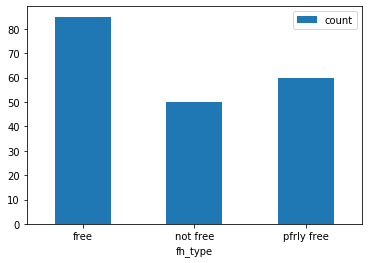

In [91]:
%matplotlib inline
ax = df_mini.plot.bar(x='fh_type', y='count', rot=0)